In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date', parse_dates=True)

In [4]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['AAPL', 'CISCO', 'IBM', 'AMZN']

In [5]:
stocks.head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [6]:
stocks.pct_change(1).mean()

AAPL     0.000750
CISCO    0.000599
IBM      0.000081
AMZN     0.001328
dtype: float64

In [7]:
stocks.pct_change(1).corr()

,AAPL,CISCO,IBM,AMZN
AAPL,1.000000,0.301990,0.297498,0.235487
CISCO,0.301990,1.000000,0.424672,0.284470
IBM,0.297498,0.424672,1.000000,0.258492
AMZN,0.235487,0.284470,0.258492,1.000000


In [8]:
stocks.pct_change(1).head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [9]:
log_ret = np.log(stocks / stocks.shift(1))
log_ret.head()

,AAPL,CISCO,IBM,AMZN
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


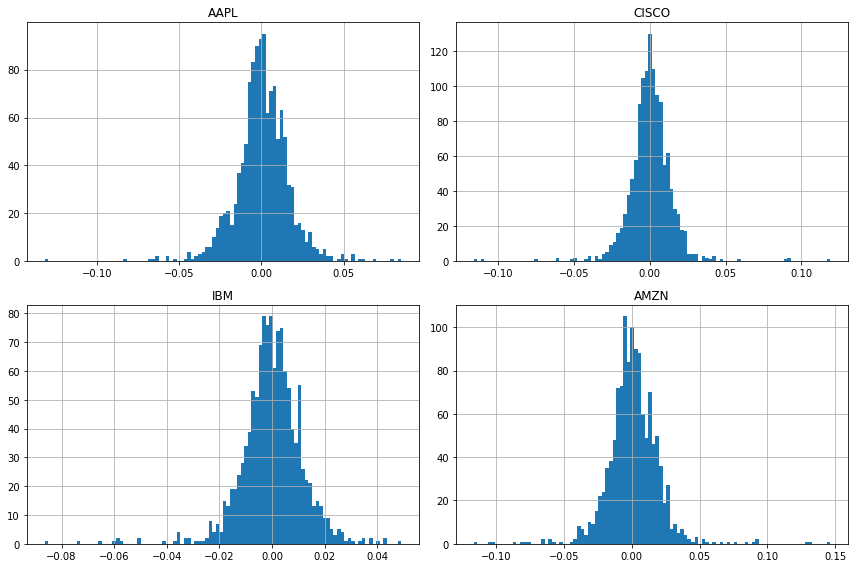

In [10]:
log_ret.hist(bins=100, figsize=(12, 8))
plt.tight_layout()

In [11]:
log_ret.mean()

AAPL     0.000614
CISCO    0.000497
IBM      0.000011
AMZN     0.001139
dtype: float64

In [12]:
log_ret.cov()

,AAPL,CISCO,IBM,AMZN
AAPL,0.000271,0.000071,0.000057,0.000075
CISCO,0.000071,0.000204,0.000072,0.000079
IBM,0.000057,0.000072,0.000140,0.000059
AMZN,0.000075,0.000079,0.000059,0.000375


In [13]:
log_ret.cov() * 252

,AAPL,CISCO,IBM,AMZN
AAPL,0.068326,0.017854,0.014464,0.018986
CISCO,0.017854,0.051381,0.018029,0.019956
IBM,0.014464,0.018029,0.035203,0.014939
AMZN,0.018986,0.019956,0.014939,0.094470


In [14]:
stocks.columns

Index(['AAPL', 'CISCO', 'IBM', 'AMZN'], dtype='object')

In [15]:
np.random.seed(101) # Get always the same random values

weights = np.array(np.random.random(4))
print('Random weights:', weights)

weights = weights / np.sum(weights)
print('Rebalance:', weights)

exp_ret = np.sum((log_ret.mean() * weights) * 252)
print('Expected Portfolio Return:', exp_ret)

exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print('Expected Volatility:', exp_vol)

SR = exp_ret / exp_vol
print('Sharpe Ratio:', SR)

Random weights: [0.51639863 0.57066759 0.02847423 0.17152166]
Rebalance: [0.40122278 0.44338777 0.02212343 0.13326603]
Expected Portfolio Return: 0.15599272049632026
Expected Volatility: 0.18502649565909488
Sharpe Ratio: 0.8430831483926045


In [17]:
np.random.seed(101) # Get always the same random values

num_ports = 5000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    weights = np.array(np.random.random(4))
    weights = weights / np.sum(weights)
    all_weights[ind,:] = weights
    
    ret_arr[ind] = np.sum((log_ret.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind] / vol_arr[ind]

In [19]:
sharpe_arr.max()

1.030326055127108

In [21]:
sharpe_arr.argmax()

1420

In [23]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [25]:
max_sr_return = ret_arr[1420]
max_sr_volatility = vol_arr[1420]

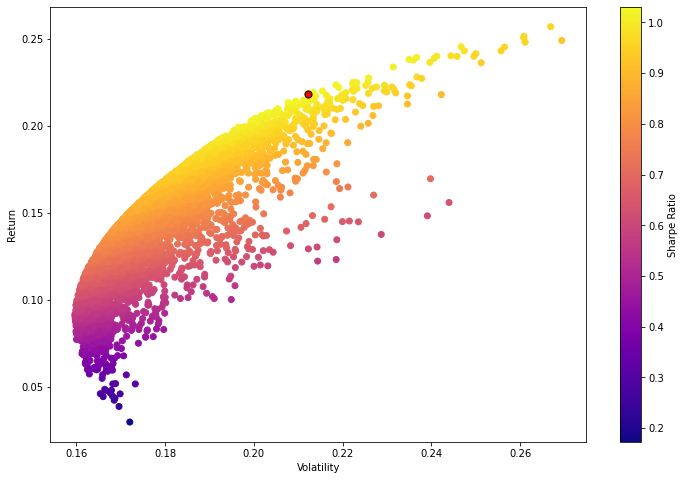

In [26]:
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_volatility, max_sr_return, c='red', s=50, edgecolors='black')

In [27]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

In [28]:
from scipy.optimize import minimize

In [29]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see h

In [30]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [31]:
def check_sum(weights):
    # Return 0 if sum of weights is 1
    return np.sum(weights) - 1

In [32]:
cons = ({ 'type': 'eq', 'fun': check_sum })
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
init_guess = [0.25, 0.25, 0.25, 0.25]

In [33]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results

     fun: -1.0307168703349947
     jac: array([ 5.64306974e-05,  4.18424606e-05,  3.39921728e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289773e-01, 2.04189824e-01, 1.34034494e-16, 5.29520403e-01])

In [34]:
opt_results.x

array([2.66289773e-01, 2.04189824e-01, 1.34034494e-16, 5.29520403e-01])

In [35]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [36]:
frontier_y = np.linspace(0, 0.3, 100)
frontier_y

array([0.        , 0.0030303 , 0.00606061, 0.00909091, 0.01212121,
       0.01515152, 0.01818182, 0.02121212, 0.02424242, 0.02727273,
       0.03030303, 0.03333333, 0.03636364, 0.03939394, 0.04242424,
       0.04545455, 0.04848485, 0.05151515, 0.05454545, 0.05757576,
       0.06060606, 0.06363636, 0.06666667, 0.06969697, 0.07272727,
       0.07575758, 0.07878788, 0.08181818, 0.08484848, 0.08787879,
       0.09090909, 0.09393939, 0.0969697 , 0.1       , 0.1030303 ,
       0.10606061, 0.10909091, 0.11212121, 0.11515152, 0.11818182,
       0.12121212, 0.12424242, 0.12727273, 0.13030303, 0.13333333,
       0.13636364, 0.13939394, 0.14242424, 0.14545455, 0.14848485,
       0.15151515, 0.15454545, 0.15757576, 0.16060606, 0.16363636,
       0.16666667, 0.16969697, 0.17272727, 0.17575758, 0.17878788,
       0.18181818, 0.18484848, 0.18787879, 0.19090909, 0.19393939,
       0.1969697 , 0.2       , 0.2030303 , 0.20606061, 0.20909091,
       0.21212121, 0.21515152, 0.21818182, 0.22121212, 0.22424

In [37]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [45]:
frontier_volatility = []

for possible_return in frontier_y:
    my_cons = (
        { 'type': 'eq', 'fun': check_sum },
        { 'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return }
    )
    result = minimize(minimize_volatility, init_guess, method='SLSQP', bounds=bounds, constraints=my_cons)
    frontier_volatility.append(result['fun'])

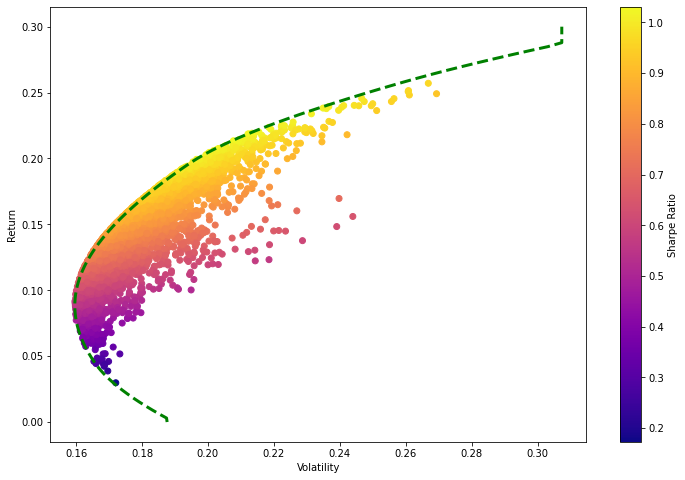

In [46]:
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)